<a href="https://colab.research.google.com/github/Ayush-rawat7/Chatbot-with-Python-NLTK/blob/main/Chatbot_with_Python%2BNLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import  numpy as np
import random
import nltk
import string


**Reading the Corpus Of text**

In [3]:
f = open('/content/drive/MyDrive/Colab Notebooks/Chatbot with Nltk/Chatbot.txt','r',errors='ignore')
raw_doc = f.read()


In [4]:
raw_doc #This is a about Chatbot data picked from IBM.com

"Skip to content\n\nThink\nArtificial intelligence\nCloud\nSecurity\nVideos\nReports\nPodcasts\nEvents\nMore\nSubscribe\nWhat is a chatbot?\nSmiling businessman using smart phone while sitting by computer desk. \nArtificial Intelligence\nWhat is a chatbot?\nThe value of chatbots\nHow chatbots work\nChatbots versus AI chatbots versus virtual agents\nCommon chatbot use cases\nBenefits of chatbots\nRisks and limitations of chatbots\nBest practices and tips for selecting chatbots\nWhat is a chatbot?\nA chatbot is a computer program that simulates human conversation with an end user. Not all chatbots are equipped with artificial intelligence (AI), but modern chatbots increasingly use conversational AI techniques such as natural language processing (NLP) to understand user questions and automate responses to them.\n\nGenerative AI-powered chatbots\nThe next generation of chatbots with generative AI capabilities will offer even more enhanced functionality with their understanding of common la

#**Pre-processing the text data in raw_doc**

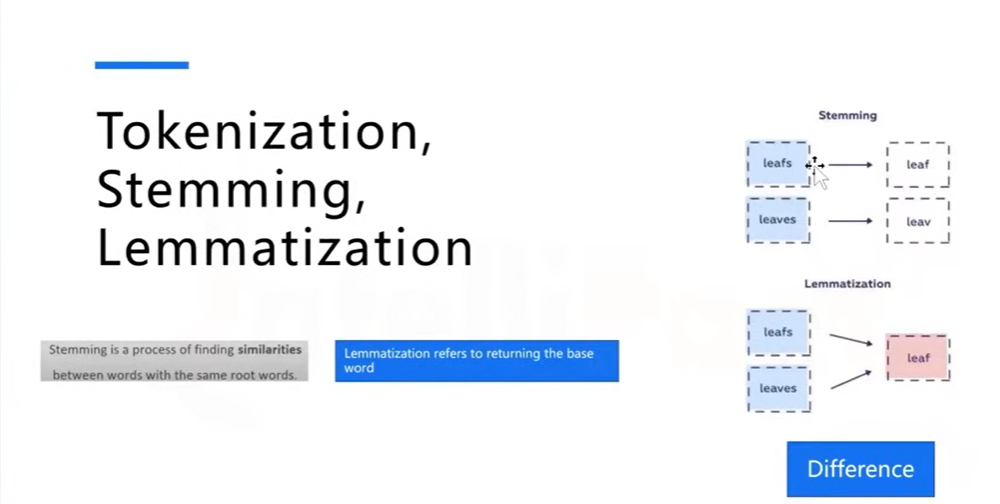

In [5]:
raw_doc = raw_doc.lower()   #converting all texts to lowercase
nltk.download('punkt_tab')      #Using the punkt Tokenizer
nltk.download('wordnet')    #Using the wordnet Dictionary
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [6]:
raw_doc

"skip to content\n\nthink\nartificial intelligence\ncloud\nsecurity\nvideos\nreports\npodcasts\nevents\nmore\nsubscribe\nwhat is a chatbot?\nsmiling businessman using smart phone while sitting by computer desk. \nartificial intelligence\nwhat is a chatbot?\nthe value of chatbots\nhow chatbots work\nchatbots versus ai chatbots versus virtual agents\ncommon chatbot use cases\nbenefits of chatbots\nrisks and limitations of chatbots\nbest practices and tips for selecting chatbots\nwhat is a chatbot?\na chatbot is a computer program that simulates human conversation with an end user. not all chatbots are equipped with artificial intelligence (ai), but modern chatbots increasingly use conversational ai techniques such as natural language processing (nlp) to understand user questions and automate responses to them.\n\ngenerative ai-powered chatbots\nthe next generation of chatbots with generative ai capabilities will offer even more enhanced functionality with their understanding of common la

In [7]:
#Doing Tokenization
sentence_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

In [8]:
#After Tokenization

sentence_tokens[:5]

['skip to content\n\nthink\nartificial intelligence\ncloud\nsecurity\nvideos\nreports\npodcasts\nevents\nmore\nsubscribe\nwhat is a chatbot?',
 'smiling businessman using smart phone while sitting by computer desk.',
 'artificial intelligence\nwhat is a chatbot?',
 'the value of chatbots\nhow chatbots work\nchatbots versus ai chatbots versus virtual agents\ncommon chatbot use cases\nbenefits of chatbots\nrisks and limitations of chatbots\nbest practices and tips for selecting chatbots\nwhat is a chatbot?',
 'a chatbot is a computer program that simulates human conversation with an end user.']

In [9]:
word_tokens[:5]

['skip', 'to', 'content', 'think', 'artificial']

**Performing text preProcessing steps.**


In [10]:
#Using Lemmatization and Tokenization
#lemmatization is the process of reducing a word to its base or dictionary form

lemmer = nltk.stem.WordNetLemmatizer()   #WordNetLemmatizer is a class that provides methods to perform lemmatization.
def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]  #For each token in the tokens list, the lemmatize() method of the lemmer object (created earlier) is called. This method reduces each token to its lemma.
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

#nltk.word_tokenize(...): The word_tokenize() function from nltk is used to split the text into a list of words. This is tokenization.
#LemTokens(...): The LemTokens function (defined earlier) is called on the list of words from the previous step. This performs lemmatization on each word.


**Define Greeting Finctions**

In [11]:
greet_inputs = ('hello','hi','whassup','hey','how are you?')
greet_responses = ('hii','hey there!','Am fine,What about You?')

def greet(sentence):
  for word in sentence.split():
    if word.lower() in greet_inputs:
      return random.choice(greet_responses)

**Response generation By the BOT**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import  cosine_similarity

#The TfidfVectorizer does 3 things. It counts the words, it calculates the TF-IDF score, and it row normalizes the vector.

#TfidfVectorizer converts text into numerical vectors, giving a higher value to words that are more important in a specific document.

#cosine_similarity is then used to compare these vectors. Documents with similar word importance vectors will have a higher cosine similarity score.

Creating a function to generate response to eveery user

In [13]:
def response(user_response):
  robo1_response = ''
  TfidfVec = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english')
  tfidf = TfidfVec.fit_transform(sentence_tokens)
  vals = cosine_similarity(tfidf[-1],tfidf)
  idx = vals.argsort()[0][-2]
  flat = vals.flatten()
  flat.sort()
  req_tfidf = flat[-2]

  if (req_tfidf == 0):
    robo1_response = robo1_response + "I am sorry. Unable to understand you!"
    return robo1_response
  else:
    robo1_response = robo1_response + sentence_tokens[idx]
    return robo1_response

#Defining the ChatFlow

In [14]:
flag = True
print('Hello! I am a Smart Learning Bot.Start typing your text to talk to me')
while(flag == True):
  user_response = input()
  user_response = user_response.lower()
  if(user_response != 'bye'):
    if(user_response == 'thanks' or user_response == 'thank you'):
      flag = False
      print('BOT: You are welcome..')
    else:
      if(greet(user_response) != None):
        print('BOT:' + greet(user_response))
      else:
        sentence_tokens.append(user_response)
        word_tokens = word_tokens + nltk.word_tokenize(user_response)
        final_words = list(set(word_tokens))
        print('BOT: ', end = '' )
        print(response(user_response))
        sentence_tokens.remove(user_response)
  else:
    flag = False
    print('BOT: Goodbye!')


Hello! I am a Smart Learning Bot.Start typing your text to talk to me
hii
BOT: 

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


I am sorry. Unable to understand you!
hey there
BOT:hii
what are chatbots?
BOT: the value of chatbots
how chatbots work
chatbots versus ai chatbots versus virtual agents
common chatbot use cases
benefits of chatbots
risks and limitations of chatbots
best practices and tips for selecting chatbots
what is a chatbot?
yes tell me about a chatbot
BOT: with a traditional chatbot, the user can use the specific phrase “tell me the weather forecast.” the chatbot says it will rain.
what is Generative AI-powered chatbots?
BOT: generative ai-powered chatbots
the next generation of chatbots with generative ai capabilities will offer even more enhanced functionality with their understanding of common language and complex queries, their ability to adapt to a user’s style of conversation and use of empathy when answering users’ questions.
what is a chatbot?
BOT: artificial intelligence
what is a chatbot?
what is CRM system?
BOT: to get the most from an organization’s existing data, enterprise-grade ch